In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

np.set_printoptions(precision=4)
pd.set_option('precision', 4)

In [2]:
class Function:
    def __init__(self, start, end, step):
        self.X = np.arange(start, end, step)
    
    def lin(self, a, b):
        self.Y = a * self.X + b
    
    def exp(self, a, b):
        self.Y = np.exp(-a * self.X) * b
       
    def rand(self, scale):
        self.Y = [random.uniform(-scale, scale) for _ in range(0, len(self.X))]
        
    def my_rand(self, scale):
        self.Y = self.get_rand_list(scale)
        
    def get_rand_list(self, scale):
        a = 45;
        c = -21;
        m = 100;
        seed = 0.4546;
        l = []
        for i in range(0, len(self.X)):
            seed = (a * seed + c) % m
            l.append(seed)
        return [(((l[i] - min(l)) / (max(l) - min(l))) * 2 - 1) * scale for i in range(0, len(l))]
        
    def sin(self, A, f):
        self.Y = A * np.sin(2 * np.pi * f * self.X)
        
    def sin_complex(self, A, f):
        sum = 0
        for i in range(0, len(A)):
            sum += A[i] * np.sin(2 * np.pi * f[i] * self.X)
        self.Y = sum
        
    def func_complex(self, arrFunc):
        sum = 0
        for i in range(0, len(arrFunc)):
            sum += arrFunc[i]
        self.Y = sum
        
    def func_approximation(self, func, L):
        self.X = self.X[:len(self.X) - L]
        self.Y = []
        for x in self.X:
            sum = 0
            for k in range(x, x + L):
                sum += func[k]
            self.Y.append(sum / L)
    
    def anti_random(self, start, N, step, dt, A, f, scale, iterations):
        funcSin = Function(start, N * dt, dt)
        funcSin.sin(A, f)
        funcRand = Function(start, N, step)
        funcRand.rand(scale)
        funcComplex = Function(start, N * dt, dt)
        funcComplexArr = []
        for i in range(0, iterations):
            funcRand.rand(scale)
            funcComplex.func_complex([funcSin.Y, funcRand.Y])
            funcComplexArr.append(funcComplex.Y / iterations)
        funcComplex.func_complex(funcComplexArr)
        self.Y = funcComplex.Y    

    def display(self, title, xlabel='x', ylabel='y'):
        plt.plot(self.X, self.Y)
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.grid(True)

In [3]:
class Metric:
    @staticmethod
    def std_dev(func):
        return np.var(func) ** (0.5)

    @staticmethod
    def mid_sqr(func):
        sum = 0
        for val in func:
            sum += val ** 2
        return sum / len(func)

    @staticmethod
    def mid_sqr_dev(func):
        sum = 0
        for val in func:
            sum += val ** 2
        return (sum / len(func)) ** (0.5)

    @staticmethod
    def asym(func):
        sum = 0
        for val in func:
            sum += (val - np.mean(func)) ** 3
        return  sum / len(func)

    @staticmethod
    def exc(func):
        sum = 0
        for val in func:
            sum += (val - np.mean(func)) ** 4
        return sum / len(func)

    @staticmethod
    def aC(func):
        return Metric.asym(func) / (Metric.std_dev(func) ** 3)

    @staticmethod
    def eC(func):
        return (Metric.exc(func) / (Metric.std_dev(func) ** 4)) - 3

    @staticmethod
    def split_list(alist, wanted_parts=1):
        length = len(alist)
        return [ alist[i * length // wanted_parts: (i + 1) * length // wanted_parts] for i in range(wanted_parts) ]

    @staticmethod
    def split(func, M, devotion=10):
        split_func = Metric.split_list(func, wanted_parts=M)
        mean, disp = [], []
        for part in split_func:
            mean.append(np.mean(part))
            disp.append(np.var(part))
        check = True
        for i in range(0, len(mean)):
            if abs(((np.mean(func) - mean[i]) / np.mean(func)) * 100) > devotion or \
               abs(((np.var(func) - disp[i]) / np.var(func)) * 100) > devotion:
                check = False
                break
        return {'Means': mean, 'Dispersions': disp, 'Check': check}  

In [4]:
class Correlation:
    @staticmethod
    def Rxx(func):
        N = len(func)
        meanF = np.mean(func)
        corr = []
        for l in range(0, N):
            sum1 = 0
            sum2 = 0
            for k in range(0, N - l):
                sum1 += (func[k] - meanF) * (func[k + l] - meanF)
            for k in range(0, N):
                sum2 += (func[k] - meanF) * (func[k] - meanF)
            corr.append(sum1 / sum2)
        return corr

    @staticmethod
    def RxxMean(func):
        N = len(func)
        meanF = np.mean(func)
        corr = []
        for l in range(0, N):
            sum = 0
            for k in range(0, N - l):
                sum += (func[k] - meanF) * (func[k + l] - meanF)
            corr.append(sum / N)
        return corr

    @staticmethod
    def Rxy(func1, func2):
        N = len(func1)
        meanF1 = np.mean(func1)
        meanF2 = np.mean(func2)
        corr = []
        for l in range(0, N):
            sum = 0
            for k in range(0, N - l):
                sum += (func1[k] - meanF1) * (func2[k + l] - meanF2)
            corr.append(sum / N)
        return corr

In [5]:
class Damage:
    @staticmethod
    def offset(func, offset):
        return func + offset

    @staticmethod
    def emission(func):
        num_of_emissions = random.randint(1, 5)
        place_of_emissions = []
        val_of_emissions = []
        sign_of_emissions = []
        for i in range(0, num_of_emissions):
            place_of_emissions.append(random.randint(0, len(func) - 1))
            offset = random.uniform(min(func), max(func))
            offset = offset if random.randint(0, 1) else -1 * offset
            val_of_emissions.append(max(func) * 10 * random.uniform(1, 3) + offset)
            sign_of_emissions.append(1 if random.randint(0, 1) else -1)
            func[place_of_emissions[i]] = val_of_emissions[i] * sign_of_emissions[i]   
        return func
    
    @staticmethod
    def anti_offset(func):
        return Damage.offset(func, -np.mean(func))
    
    @staticmethod
    def get_indexes(func, index, scale):
        res_index_further =  None
        res_index_backward =  None
        if index != len(func) - 1:
            for i in range(index + 1, len(func)):
                if func[i] < scale and func[i] > -scale:
                    res_index_further = i
                    break
        if index != 0:
            for i in range(index - 1, -1, -1):
                if func[i] < scale and func[i] > -scale:
                    res_index_backward = i
                    break
        return [res_index_backward, res_index_further]
            
    @staticmethod
    def anti_emission(func, scale):
        for i in range(1, len(func) - 1):
            if func[i] > scale or func[i] < -scale:
                func[i] = (func[Damage.get_indexes(func, i, scale)[0]] + func[Damage.get_indexes(func, i, scale)[1]]) / 2
        if func[0] > scale or func[0] < -scale:
            func[0] = func[Damage.get_indexes(func, 0, scale)[1]]
        if func[len(func) - 1] > scale or func[len(func) - 1] < -scale:
            func[len(func) - 1] = func[Damage.get_indexes(func, len(func) - 1, scale)[0]]
        return func

<h4><b>Задание 1:</b></h4>

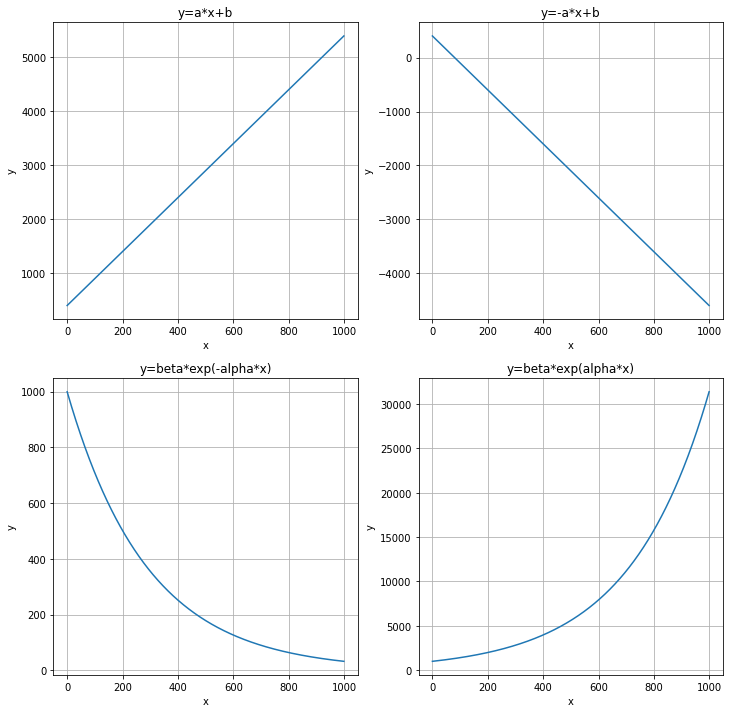

In [6]:
func = Function(0, 1000, 1)

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
func.lin(5, 400)
func.display('y=a*x+b')

plt.subplot(2, 2, 2)
func.lin(-5, 400)
func.display('y=-a*x+b')

plt.subplot(2, 2, 3)
func.exp(0.00345, 1000)
func.display('y=beta*exp(-alpha*x)')

plt.subplot(2, 2, 4)
func.exp(-0.00345, 1000)
func.display('y=beta*exp(alpha*x)')

<h4><b>Задание 2:</b></h4>

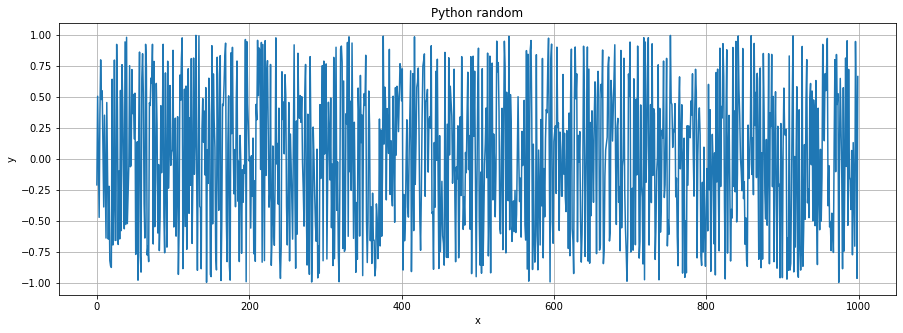

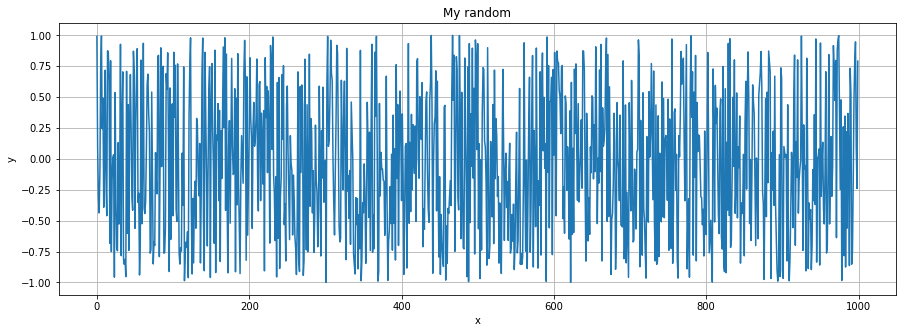

In [7]:
func = Function(0, 1000, 1)

plt.figure(figsize=(15, 5))
func.rand(1)
func.display('Python random')

plt.figure(figsize=(15, 5))
func.my_rand(1)
func.display('My random')

<h4><b>Задание 3:</b></h4>

In [8]:
func = Function(0, 1000, 1)
func.rand(1)

keys = ['Min:', 'Max:', 'Mean:', 'Dispersion:', 'Standart deviation:', 'Middle square:', 'Middle square deviation:',
        'Asymmetry:', 'Excess:', 'aC:', 'eC:']
values = [min(func.Y), max(func.Y), np.mean(func.Y), np.var(func.Y), Metric.std_dev(func.Y), Metric.mid_sqr(func.Y), Metric.mid_sqr_dev(func.Y),
          Metric.asym(func.Y), Metric.exc(func.Y), Metric.aC(func.Y), Metric.eC(func.Y)]
  
output = pd.Series(values, index=keys)
print(output)

Min:                       -0.9998
Max:                        0.9905
Mean:                      -0.0182
Dispersion:                 0.3277
Standart deviation:         0.5725
Middle square:              0.3281
Middle square deviation:    0.5728
Asymmetry:                  0.0038
Excess:                     0.1954
aC:                         0.0200
eC:                        -1.1809
dtype: float64


Random function:
    Means  Dispersions
0  0.0027       0.3293
1 -0.0464       0.3249
2 -0.1928       0.2998
3  0.0003       0.3319
4  0.0843       0.3602
5  0.0209       0.2949
6 -0.0417       0.3353
7  0.0486       0.3189
8 -0.0747       0.3270
9  0.0170       0.3016
Stationarity:  False 

Trend function:
      Means  Dispersions
0  847.1978    7104.3235
1  600.0028    3563.3587
2  424.9342    1787.2954
3  300.9470     896.4646
4  213.1368     449.6452
5  150.9478     225.5313
6  106.9043     113.1211
7   75.7118      56.7388
8   53.6206      28.4588
9   37.9752      14.2743
Stationarity:  False


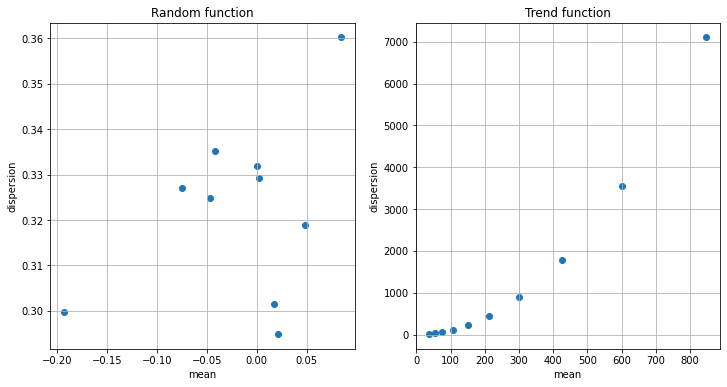

In [9]:
plt.figure(figsize=(12, 6))

split_metrics = Metric.split(func.Y, 10, 10)
df = pd.DataFrame({
    'Means': split_metrics['Means'], 
    'Dispersions': split_metrics['Dispersions']
}, index=None)
print('Random function:')
print(df)
print('Stationarity: ', split_metrics['Check'], '\n')

plt.subplot(1, 2, 1)
plt.scatter(split_metrics['Means'], split_metrics['Dispersions'], lw=1)
plt.xlabel('mean')
plt.ylabel('dispersion')
plt.title('Random function')
plt.grid(True)

func.exp(0.00345, 1000)
split_metrics = Metric.split(func.Y, 10, 10)
df = pd.DataFrame({
    'Means': split_metrics['Means'], 
    'Dispersions': split_metrics['Dispersions']
}, index=None)
print('Trend function:')
print(df)
print('Stationarity: ', split_metrics['Check'])

plt.subplot(1, 2, 2)
plt.scatter(split_metrics['Means'], split_metrics['Dispersions'], lw=1)
plt.xlabel('mean')
plt.ylabel('dispersion')
plt.title('Trend function')
plt.grid(True)

<h4><b>Задание 4:</b></h4>

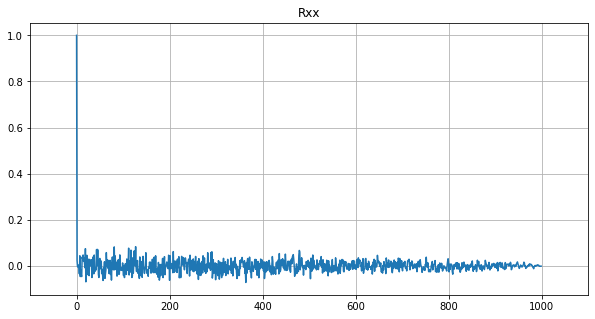

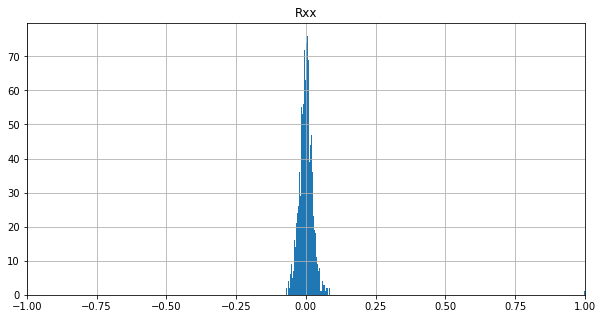

In [10]:
N = 1000
scale = 1

func1 = Function(0, N, 1)
func1.rand(scale)

func2 = Function(0, N, 1)
func2.rand(scale)

Rxx = Correlation.Rxx(func1.Y)

plt.figure(figsize=(10, 5))
plt.plot(func1.X, Rxx)
plt.xlim(-0.1 * N, N + 0.1 * N)
plt.title('Rxx')
plt.grid(True)

plt.figure(figsize=(10, 5))
plt.hist(Rxx, 300)
plt.xlim(-scale, scale)
plt.title('Rxx')
plt.grid(True)

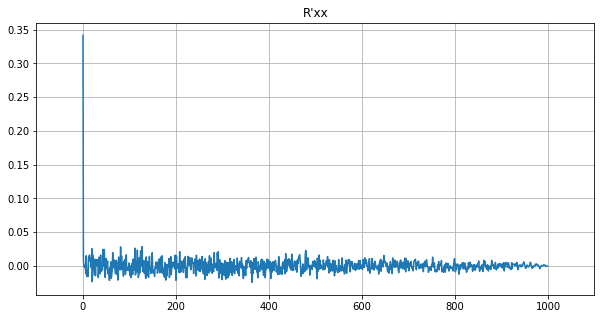

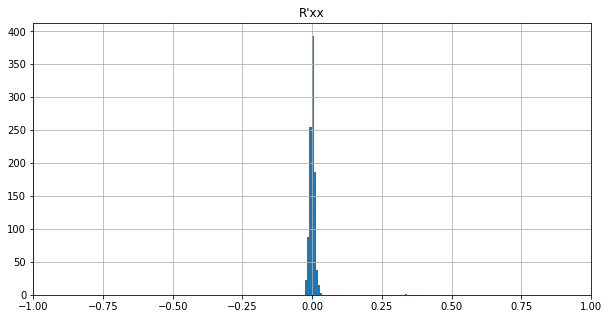

In [11]:
RxxMean = Correlation.RxxMean(func1.Y)

plt.figure(figsize=(10, 5))
plt.plot(func1.X, RxxMean)
plt.xlim(-0.1 * N, N + 0.1 * N)
plt.title('R\'xx')
plt.grid(True)

plt.figure(figsize=(10, 5))
plt.hist(RxxMean, 50)
plt.xlim(-scale, scale)
plt.title('R\'xx')
plt.grid(True)

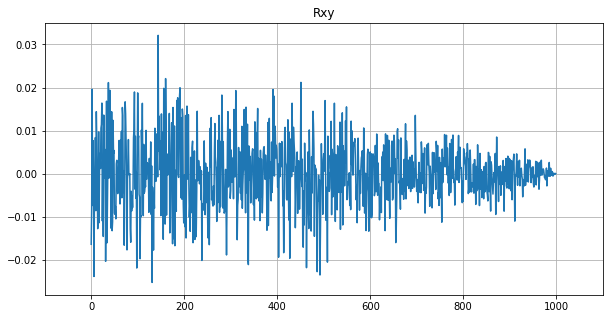

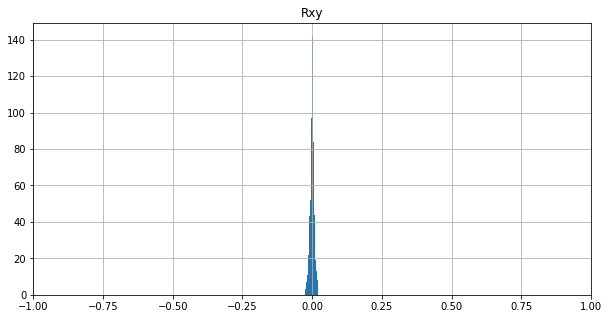

In [12]:
Rxy = Correlation.Rxy(func1.Y, func2.Y)

plt.figure(figsize=(10, 5))
plt.plot(func1.X, Rxy)
plt.xlim(-0.1 * N, N + 0.1 * N)
plt.title('Rxy')
plt.grid(True)

plt.figure(figsize=(10, 5))
plt.hist(Rxy, 30)
plt.xlim(-scale, scale)
plt.title('Rxy')
plt.grid(True)

<h4><b>Задание 5:</b></h4>

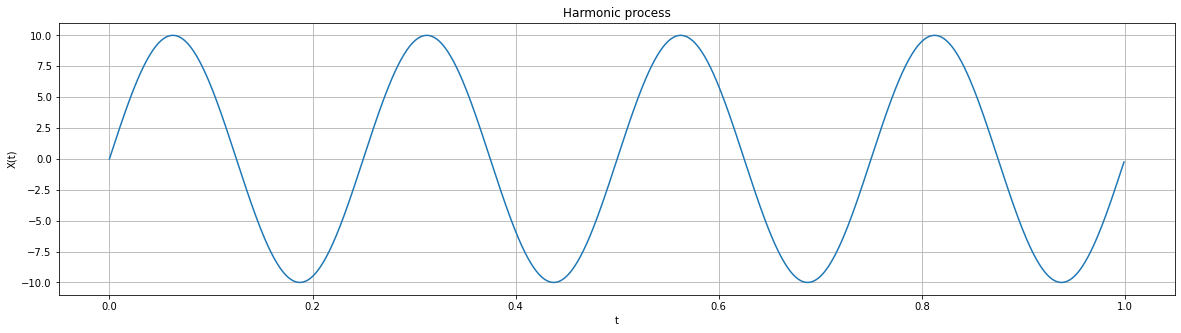

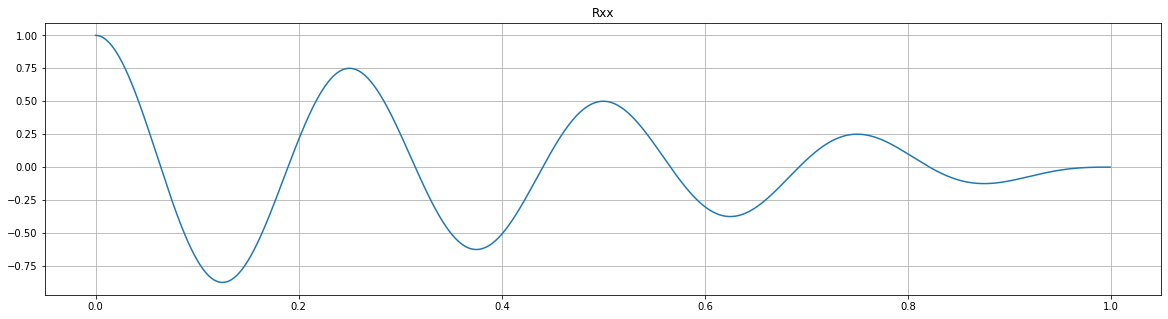

In [13]:
N = 1000
A = 10
f = 4
dt = 0.001

func1 = Function(0, N * dt, dt)
func1.sin(A, f)

plt.figure(figsize=(20, 5))
func1.display('Harmonic process', 't', 'X(t)')

Rxx = Correlation.Rxx(func1.Y)

plt.figure(figsize=(20, 5))
plt.plot(func1.X, Rxx)
plt.title('Rxx')
plt.grid(True)

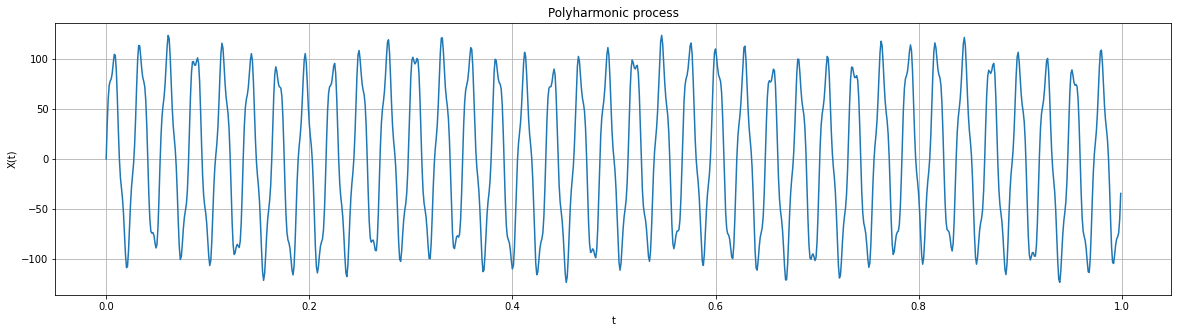

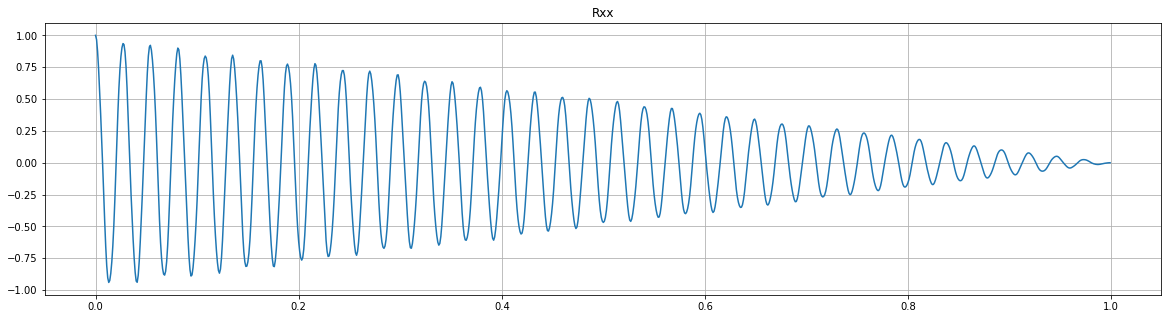

In [14]:
N = 1000
A = [10, 100, 15]
f = [4, 37, 134]
dt = 0.001

func2 = Function(0, N * dt, dt)
func2.sin_complex(A, f)
    
plt.figure(figsize=(20, 5))
func2.display('Polyharmonic process', 't', 'X(t)')

Rxx = Correlation.Rxx(func2.Y)

plt.figure(figsize=(20, 5))
plt.plot(func2.X, Rxx)
plt.title('Rxx')
plt.grid(True)

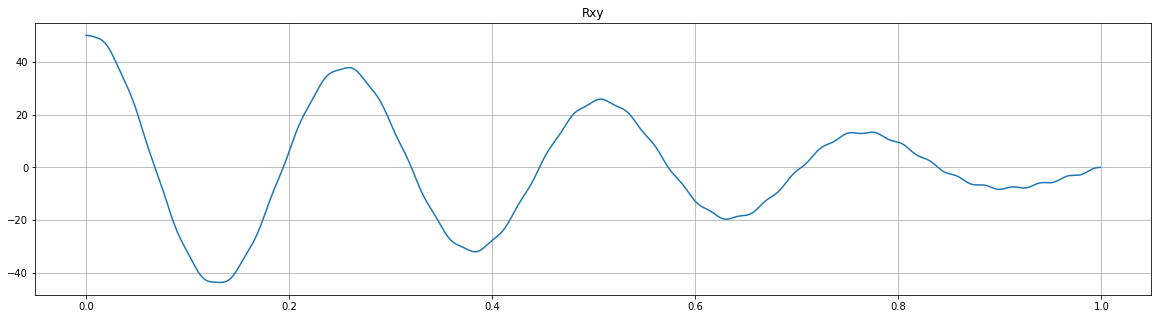

In [15]:
Rxy = Correlation.Rxy(func1.Y, func2.Y)

plt.figure(figsize=(20, 5))
plt.plot(func1.X, Rxy)
plt.title('Rxy')
plt.grid(True)

<h4><b>Задание 6:</b></h4>

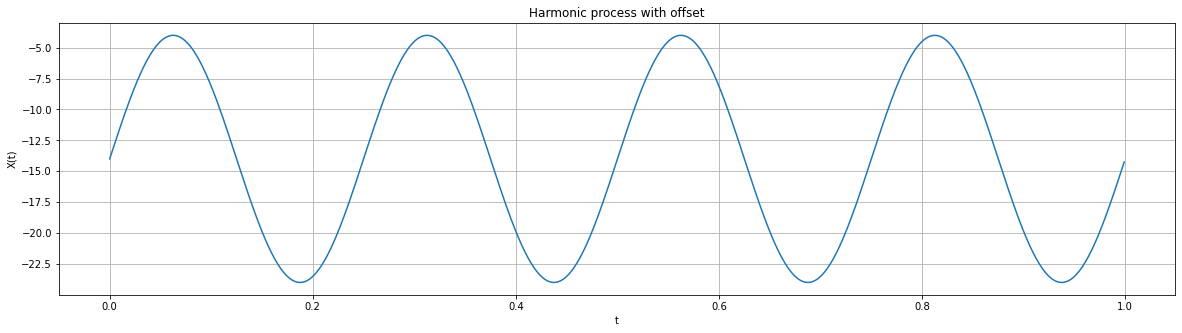

In [16]:
N = 1000
A = 10
f = 4
dt = 0.001

func1 = Function(0, N * dt, dt)
func1.sin(A, f)
func1.Y = Damage.offset(func1.Y, -14)
plt.figure(figsize=(20, 5))
func1.display('Harmonic process with offset', 't', 'X(t)')

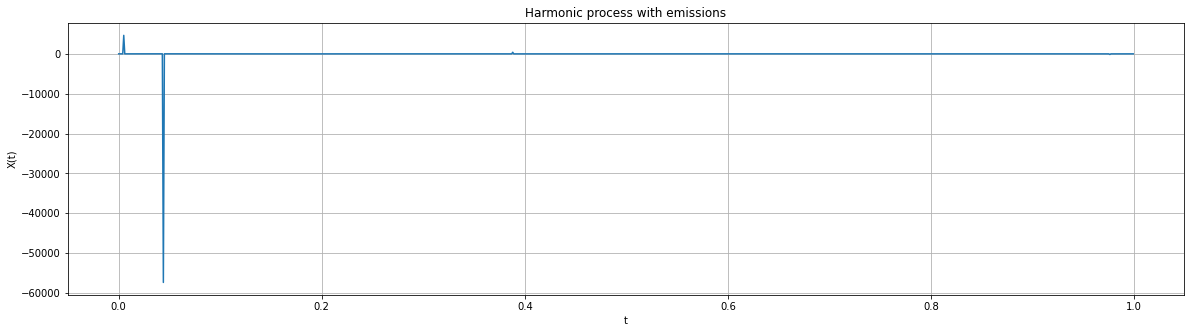

In [17]:
func2 = Function(0, N * dt, dt)
func2.sin(A, f)
func2.Y = Damage.emission(func2.Y)
plt.figure(figsize=(20, 5))
func2.display('Harmonic process with emissions', 't', 'X(t)')

<h4><b>Задание 7:</b></h4>

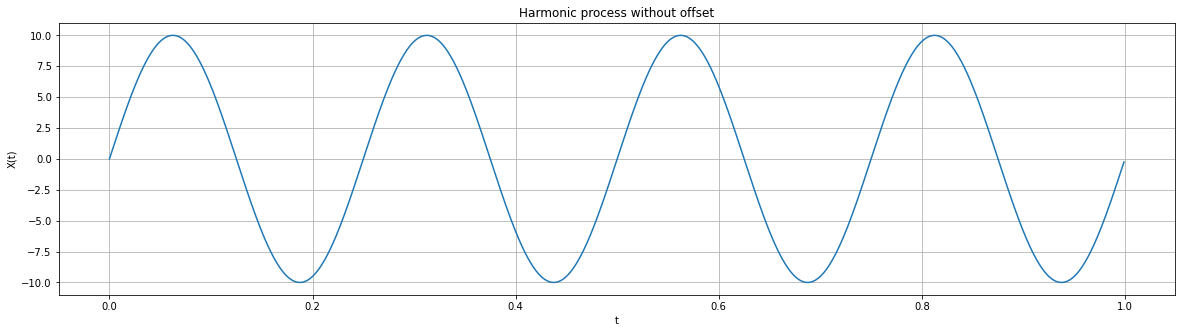

In [18]:
func1.Y = Damage.anti_offset(func1.Y)
plt.figure(figsize=(20, 5))
func1.display('Harmonic process without offset', 't', 'X(t)')

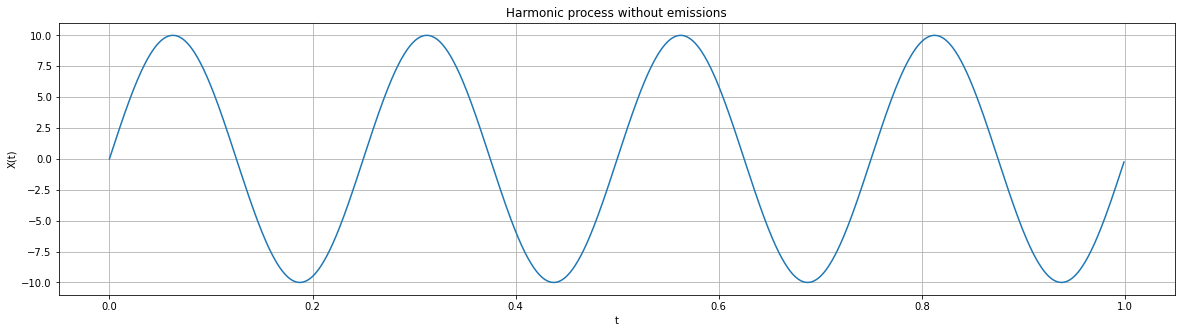

In [19]:
func2.Y = Damage.anti_emission(func2.Y, A)
plt.figure(figsize=(20, 5))
func2.display('Harmonic process without emissions', 't', 'X(t)')

<h4><b>Задание 8:</b></h4>

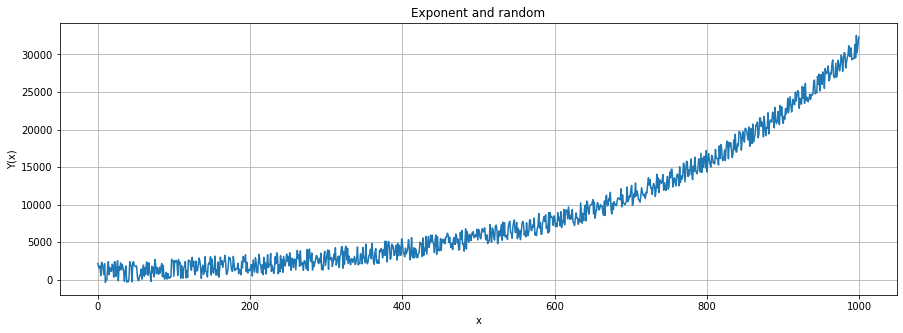

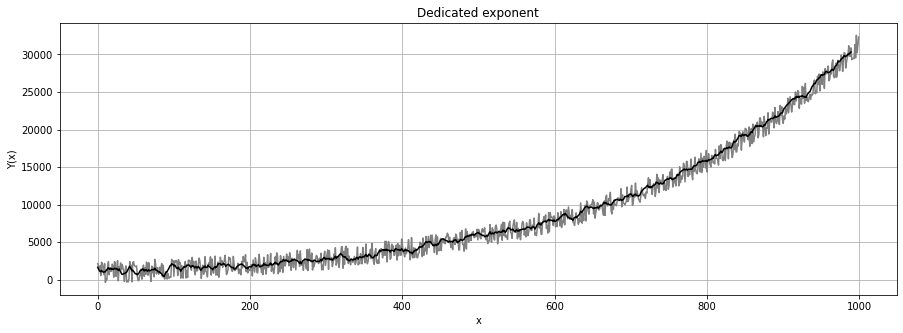

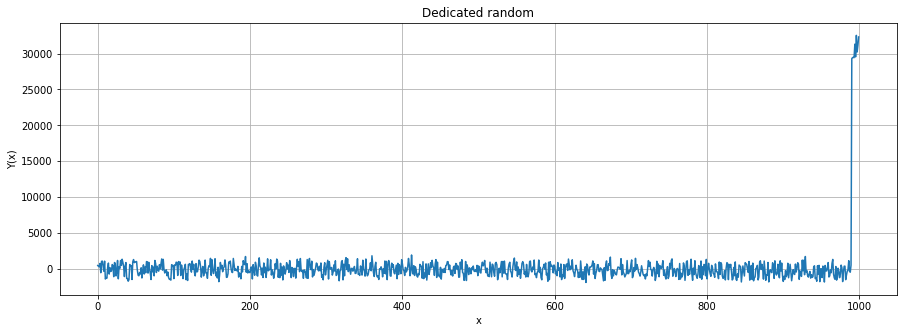

In [20]:
N = 1000
start = 0
step = 1

funcExp = Function(start, N, step)
funcExp.exp(-0.00345, 1000)

funcRand = Function(start, N, step)
funcRand.rand(1500)

funcComplex = Function(start, N, step)
funcComplex.func_complex([funcExp.Y, funcRand.Y])

plt.figure(figsize=(15, 5))
funcComplex.display('Exponent and random', 'x', 'Y(x)')

L = 10

funcApp = Function(start, N, step)
funcApp.func_approximation(funcComplex.Y, L)

plt.figure(figsize=(15, 5))
plt.title('Dedicated exponent')
plt.xlabel('x')
plt.ylabel('Y(x)')
plt.plot(funcComplex.X, funcComplex.Y, color='gray') 
plt.plot(funcApp.X, funcApp.Y, color='black')  
plt.grid(True)

funcComplex.func_complex([funcComplex.Y, [-1 * elem for elem in funcApp.Y] + [0] * (L)])
plt.figure(figsize=(15, 5))
funcComplex.display('Dedicated random', 'x', 'Y(x)')

Std(1): 884.7796180483091
Std(10): 306.73992876973034
Std(100): 133.90099647696064
Std(1000): 109.23303230884883


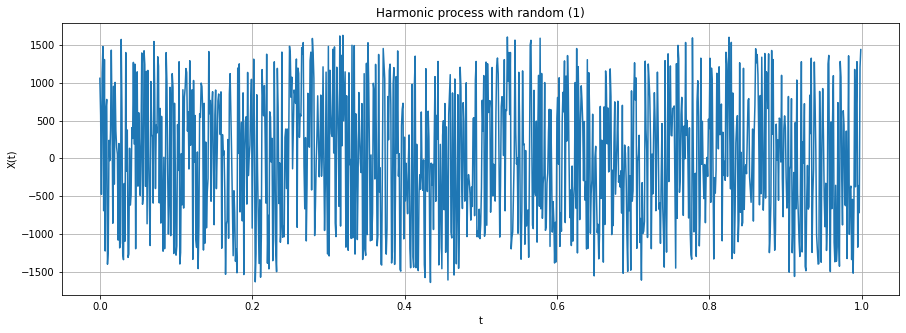

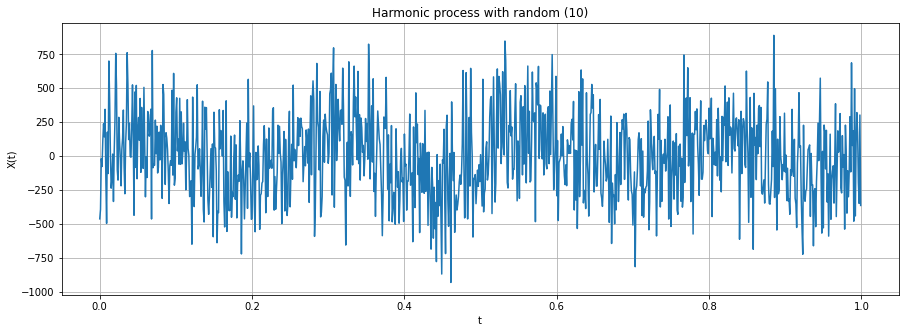

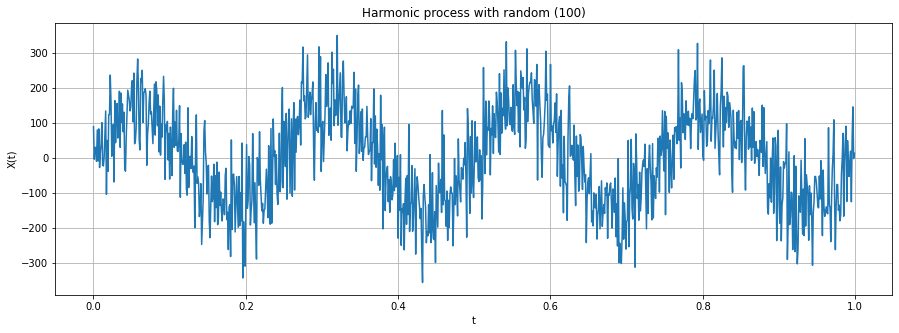

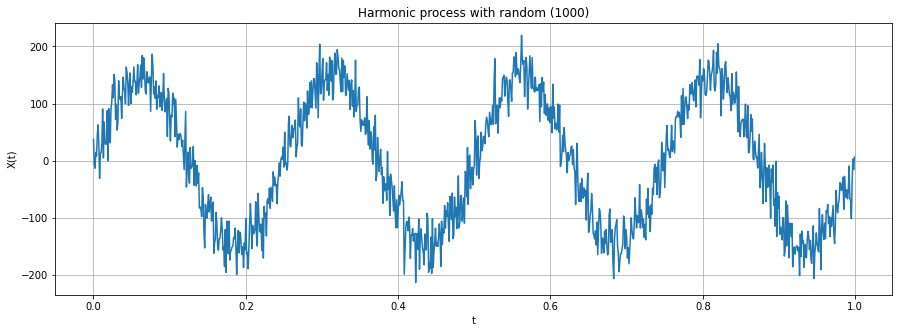

In [21]:
N = 1000
start = 0
step = 1
dt = 0.001
A = 150
f = 4
scale = 1500

funcAntiRand = Function(start, N * dt, dt)

funcAntiRand.anti_random(start, N, step, dt, A, f, scale, 1)
plt.figure(figsize=(15, 5))
funcAntiRand.display('Harmonic process with random (1)', 't', 'X(t)')
print('Std(1):', Metric.std_dev(funcAntiRand.Y))

funcAntiRand.anti_random(start, N, step, dt, A, f, scale, 10)
plt.figure(figsize=(15, 5))
funcAntiRand.display('Harmonic process with random (10)', 't', 'X(t)')
print('Std(10):', Metric.std_dev(funcAntiRand.Y))

funcAntiRand.anti_random(start, N, step, dt, A, f, scale, 100)
plt.figure(figsize=(15, 5))
funcAntiRand.display('Harmonic process with random (100)', 't', 'X(t)')
print('Std(100):', Metric.std_dev(funcAntiRand.Y))

funcAntiRand.anti_random(start, N, step, dt, A, f, scale, 1000)
plt.figure(figsize=(15, 5))
funcAntiRand.display('Harmonic process with random (1000)', 't', 'X(t)')
print('Std(1000):', Metric.std_dev(funcAntiRand.Y))

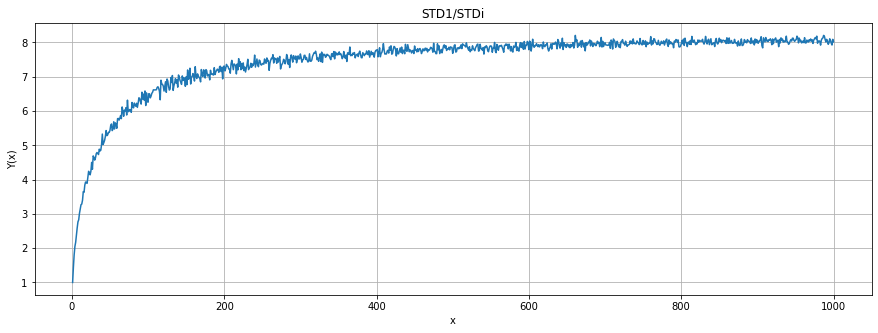

In [22]:
funcAntiRand = Function(start, N * dt, dt)
funcAntiRand.anti_random(start, N, step, dt, A, f, scale, 1)
std1 = Metric.std_dev(funcAntiRand.Y)

X = np.arange(1, 1001)
Y = []

for i in range(1, 1001):
    funcAntiRand.anti_random(start, N, step, dt, A, f, scale, i)
    Y.append(std1 / Metric.std_dev(funcAntiRand.Y))

plt.figure(figsize=(15, 5))
plt.title('STD1/STDi')
plt.xlabel('x')
plt.ylabel('Y(x)')
plt.plot(X, Y) 
plt.grid(True)